This script can be used to analyze the following parameters per condition:
* Activity over time (Spikes/s/delta time)

<i>Version: 20201130_1_GS</i>

In [1]:
import calim
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np

In [2]:
filename = "Fura2AM_Angiotensin.pkl"

data_pkl = pickle.load(open(filename, "rb"))

In [40]:
def get_binned_events(start, end, bin_size, align="left"):
    binned_events = np.array([])
    
    if align == "left": # Process this if the bins shall be aligned to start
        for i, b in enumerate(range(start+bin_size, end, bin_size)):
            events = [e.frame for e in c.get_event(list(range((i*bin_size)+start, b)))]
            binned_events = np.append(binned_events, [i, b, len(events), len(events)/bin_size])

        i+=1    
        events = [e.frame for e in c.get_event(list(range(i*bin_size, end)))]
        binned_events = np.append(binned_events, [i, end, len(events), len(events)/(end-i*bin_size)])
        
        
        
    if align == "right": # Process this if the bins shall be aligned to end
        i = len(range(end-bin_size, start, -bin_size))
        for b in range(end-bin_size, start, -bin_size):
            events = [e.frame for e in c.get_event(list(range(b, b+bin_size)))]
            binned_events = np.append(binned_events, [i, b, len(events), len(events)/bin_size])
            i-=1

        i+=1    
        events = [e.frame for e in c.get_event(list(range(i*bin_size, end)))]
        binned_events = np.append(binned_events, [i, end, len(events), len(events)/(end-i*bin_size)])

    return np.reshape(binned_events, (-1,4))



data = pd.DataFrame()
bin_size = 60 # Bin size in seconds

n_rec = len(data_pkl.recordings)
print(f"Processing {n_rec} recordings contained in {filename}:")

for i, recording in enumerate(data_pkl.recordings):
    print(f"Processing recording {(i+1)}/{n_rec}: {recording}")
    
    r = data_pkl.recordings[recording]

    info = {desc: r.information[desc] for desc in r.information}
    
    for cell in r.cells:
        c = r.cells[cell]
        
        if c.use:
            for con in r.conditions:
                info["recording"] = recording
                info["start"] = int(con.start)
                info["end"] = int(con.end)
                info["cell"] = cell
                info["dt"] = r.dt # Add "dt" aka seconds/frame
                info.update({desc: con.information[desc] for desc in con.information}) # Add all further condition variables
                
                info["bins_left"] = get_binned_events(info["start"], info["end"], int(bin_size/r.dt), align="left")
                info["bins_right"] = get_binned_events(info["start"], info["end"], int(bin_size/r.dt), align="right")
                data = data.append(pd.Series(info), ignore_index=True)

 
print("Done.")

Processing 4 recordings contained in Fura2AM_Angiotensin.pkl:
Processing recording 1/4: 200323_Slice_1_Rec_1.csv
Processing recording 2/4: 200323_Slice_2_Rec_1.csv
Processing recording 3/4: 200323_Slice_3_Rec_1.csv
Processing recording 4/4: 200323_Slice_4_Rec_1.csv
Done.


In [41]:
data

,age,angiotensin,animal,bins_left,bins_right,birthdate,cell,deathdate,dt,end,genotype,osmolality,potassium,recording,sex,slice number,start,slicenumber
0,x,20,2026,"[[0.0, 600.0, 0.0, 0.0], [1.0, 1200.0, 0.0, 0....","[[9.0, 5400.0, 0.0, 0.0], [8.0, 4800.0, 0.0, 0...",2019-12-30,Mean1,2020-03-23,0.1,6000.0,KO,295,4,200323_Slice_1_Rec_1.csv,m,1,0.0,NaN
1,x,200,2026,"[[0.0, 6601.0, 0.0, 0.0], [1.0, 7201.0, 0.0, 0...","[[9.0, 11400.0, 0.0, 0.0], [8.0, 10800.0, 0.0,...",2019-12-30,Mean1,2020-03-23,0.1,12000.0,KO,295,4,200323_Slice_1_Rec_1.csv,m,1,6001.0,NaN
2,x,500,2026,"[[0.0, 12601.0, 0.0, 0.0], [1.0, 13201.0, 0.0,...","[[15.0, 20451.0, 52.0, 0.08666666666666667], [...",2019-12-30,Mean1,2020-03-23,0.1,21051.0,KO,295,4,200323_Slice_1_Rec_1.csv,m,1,12001.0,NaN
3,x,20,2026,"[[0.0, 600.0, 41.0, 0.06833333333333333], [1.0...","[[9.0, 5400.0, 0.0, 0.0], [8.0, 4800.0, 0.0, 0...",2019-12-30,Mean2,2020-03-23,0.1,6000.0,KO,295,4,200323_Slice_1_Rec_1.csv,m,1,0.0,NaN
4,x,200,2026,"[[0.0, 6601.0, 0.0, 0.0], [1.0, 7201.0, 7.0, 0...","[[9.0, 11400.0, 0.0, 0.0], [8.0, 10800.0, 0.0,...",2019-12-30,Mean2,2020-03-23,0.1,12000.0,KO,295,4,200323_Slice_1_Rec_1.csv,m,1,6001.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,200,2026,"[[0.0, 8081.0, 26.0, 0.043333333333333335], [1...","[[10.0, 13000.0, 0.0, 0.0], [9.0, 12400.0, 3.0...",2019-12-30,Mean25,2020-03-23,0.1,13600.0,KO,295,4,200323_Slice_4_Rec_1.csv,m,NaN,7481.0,4
260,NaN,500,2026,"[[0.0, 14201.0, 0.0, 0.0], [1.0, 14801.0, 0.0,...","[[14.0, 21418.0, 0.0, 0.0], [13.0, 20818.0, 0....",2019-12-30,Mean25,2020-03-23,0.1,22018.0,KO,295,4,200323_Slice_4_Rec_1.csv,m,NaN,13601.0,4
261,NaN,20,2026,"[[0.0, 600.0, 0.0, 0.0], [1.0, 1200.0, 0.0, 0....","[[12.0, 6880.0, 0.0, 0.0], [11.0, 6280.0, 0.0,...",2019-12-30,Mean27,2020-03-23,0.1,7480.0,KO,295,4,200323_Slice_4_Rec_1.csv,m,NaN,0.0,4
262,NaN,200,2026,"[[0.0, 8081.0, 0.0, 0.0], [1.0, 8681.0, 0.0, 0...","[[10.0, 13000.0, 0.0, 0.0], [9.0, 12400.0, 0.0...",2019-12-30,Mean27,2020-03-23,0.1,13600.0,KO,295,4,200323_Slice_4_Rec_1.csv,m,NaN,7481.0,4


Text(0, 0.5, 'Mean Activity (spikes/s)')

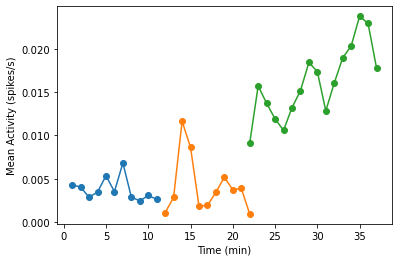

In [42]:
plt.figure()

a = data[(data["angiotensin"]=="20")].bins_right.values
b = pd.DataFrame(np.concatenate(a).flatten().reshape((-1,4)))
b.columns = ["bins", "end", "n_spikes", "activity"]

c = b.groupby("bins").activity.mean()
c_max = c.index.max()
plt.plot(c.index[:-1], c.values[:-1], "o-")

a = data[(data["angiotensin"]=="200")].bins_left.values
b = pd.DataFrame(np.concatenate(a).flatten().reshape((-1,4)))
b.columns = ["bins", "end", "n_spikes", "activity"]

c = b.groupby("bins").activity.mean()

plt.plot(c.index+c_max, c.values, "o-")
c_max = c_max + c.index.max()

a = data[(data["angiotensin"]=="500")].bins_left.values
b = pd.DataFrame(np.concatenate(a).flatten().reshape((-1,4)))
b.columns = ["bins", "end", "n_spikes", "activity"]

c = b.groupby("bins").activity.mean()

plt.plot(c.index+c_max, c.values, "o-")
c_max = c_max + c.index.max()
plt.xlabel("Time (min)")
plt.ylabel("Mean Activity (spikes/s)")



In [9]:
n_rec = len(data_pkl.recordings)
print(f"Processing {n_rec} recordings contained in {filename}:")

for i, recording in enumerate(data_pkl.recordings):
    print(f"Processing recording {(i+1)}/{n_rec}: {recording}")
    
    r = data_pkl.recordings[recording]

    info = {desc: r.information[desc] for desc in r.information}
    
    for cell in r.cells:
        c = r.cells[cell]
        
        if c.use:
            print(cell)
            info = c.get_condition_events(angiotensin="200")
            for i in info:
                events = [e.frame for e in c.get_event(range(i[0], i[1]))]
                print(events)
            
 
print("Done.")

Processing 4 recordings contained in Fura2AM_Angiotensin.pkl:
Processing recording 1/4: 200323_Slice_1_Rec_1.csv
Mean1
{'angiotensin': '200'}
From frame 0 to 6000, deadtime: 0, information: {'angiotensin': '20', 'potassium': 4, 'osmolality': '295'}
From frame 6001 to 12000, deadtime: 0, information: {'angiotensin': '200', 'potassium': '4', 'osmolality': '295'}
[]
From frame 12001 to 21051, deadtime: 0, information: {'angiotensin': '500', 'potassium': '4', 'osmolality': '295'}
From frame 0 to 6000, deadtime: 0, information: {'angiotensin': '20', 'potassium': 4, 'osmolality': '295'}
From frame 6001 to 12000, deadtime: 0, information: {'angiotensin': '200', 'potassium': '4', 'osmolality': '295'}
[]
From frame 12001 to 21051, deadtime: 0, information: {'angiotensin': '500', 'potassium': '4', 'osmolality': '295'}
Mean2
{'angiotensin': '200'}
From frame 0 to 6000, deadtime: 0, information: {'angiotensin': '20', 'potassium': 4, 'osmolality': '295'}
From frame 6001 to 12000, deadtime: 0, infor

In [38]:
len(range(5000, 200, -10))

480